### Live Recyclable Waste Image Sorting

###  GitHub Source Code Repositories

### Waste Classification Models 
https://github.com/kaush77/Machine-Vision---Recyclable-Waste-Classification
    
### Flask website to Predict Uploaded Image Category
https://github.com/kaush77/MachineVisionWebsite    

In [20]:
import os
import numpy as np
import pickle
from tensorflow.keras.models import load_model
import urllib.request
from cv2 import cv2
from keras.preprocessing import image

import os
from os import listdir
from os.path import isfile, join 


import itertools
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)

### Model Properties

In [21]:
IMAGE_SIZE = (256,256)
INPUT_SHAPE = (256,256,3)

# image class

class_mapping = {0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic'}
class_mapping_resnet50 = {0: 'glass', 1: 'metal', 2: 'paper', 3: 'plastic'}

# plot row and columns
num_rows = 1
num_cols = 3

# load image
TestImageDirectory = "TestImage"
image_list = [f for f in listdir(TestImageDirectory) if isfile(join(TestImageDirectory, f))] 
image_list

['glass.jpg', 'metal.jpg', 'paper.jpg']

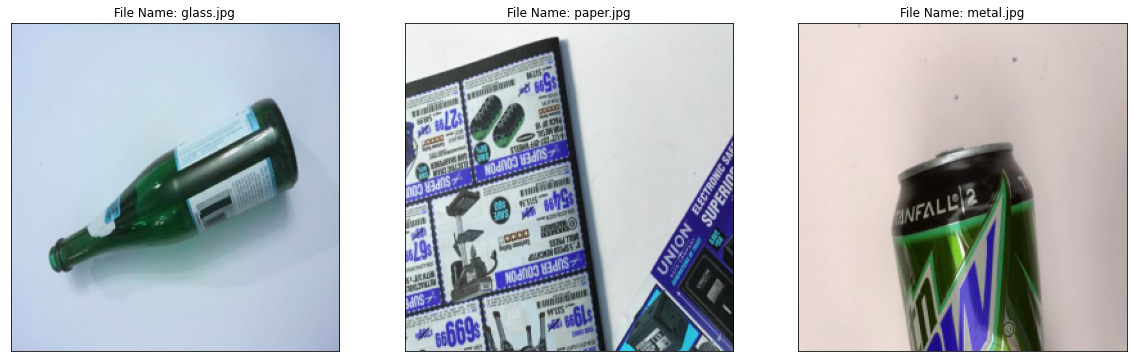

In [22]:
def plot_image(nrows, ncols,image_list):
    
    fig, axes = plt.subplots(nrows, ncols,figsize=(20, 13))    
    rs = np.random.choice(len(image_list),nrows*ncols,replace=False)  
    
    for i, ax in zip(rs, axes.flat): 
        img = cv2.imread(os.path.join(TestImageDirectory, image_list[i]))
        img = cv2.resize(img, (IMAGE_SIZE[0], IMAGE_SIZE[1]))
        
        title = 'File Name: %s' % (image_list[i])
        ax.imshow(img, cmap='binary')
        ax.set_title(title)
         
        ax.set_xticks([])
        ax.set_yticks([]) 
        
plot_image(num_rows, num_cols,image_list);

### Load Trained Models

### ResNet-50 model

In [29]:
def predict_restnet50_model(nrows, ncols,image_list):
    
    fig, axes = plt.subplots(nrows, ncols,figsize=(15, 13))    
    rs = np.random.choice(len(image_list),nrows*ncols,replace=False)
    
    # load extended resnet model
    loaded_model = pickle.load(open("TrainedModel/model_resnet50.pkl","rb"))
    svm_model = pickle.load(open("TrainedModel/svm_resnet50.pkl","rb")) 
    
    for i, ax in zip(rs, axes.flat):
        img = cv2.imread(os.path.join(TestImageDirectory, image_list[i]))
        img = cv2.resize(img, (IMAGE_SIZE[0], IMAGE_SIZE[1]))
        img_tensor = image.img_to_array(img)
        img_tensor /= 255.
    
        features = loaded_model.predict(img_tensor.reshape(1,IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

        prediction = svm_model.predict(features)
        class_idx = int(prediction[0]) 
 
        result = class_mapping_resnet50[class_idx]
    
        title = 'Predicted: %s' % (result)
        ax.imshow(img, cmap='binary')
        ax.set_title(title)
         
        ax.set_xticks([])
        ax.set_yticks([]) 

### DenseNet-121 model

In [24]:
def predict_densenet121_model(nrows, ncols,image_list):
    
    fig, axes = plt.subplots(nrows, ncols,figsize=(20, 13))    
    rs = np.random.choice(len(image_list),nrows*ncols,replace=False)
    
    # load extended dense model
    loaded_model = load_model("TrainedModel/DenseNet121.h5")  
    
    for i, ax in zip(rs, axes.flat):
        img = cv2.imread(os.path.join(TestImageDirectory, image_list[i]))
        img = cv2.resize(img, (IMAGE_SIZE[0], IMAGE_SIZE[1]))
        img = img /255
    
        probabilities = loaded_model.predict(np.asarray([img]))[0]
        class_idx = np.argmax(probabilities)
         
        title = 'Predicted: %s , Confidence:%0.2f' % (class_mapping[class_idx],round(probabilities[class_idx],2))
        ax.imshow(img, cmap='binary')
        ax.set_title(title)
         
        ax.set_xticks([])
        ax.set_yticks([]) 

### CNN model

In [25]:
def predict_cnn_model(nrows, ncols,image_list):
    
    fig, axes = plt.subplots(nrows, ncols,figsize=(20, 13))    
    rs = np.random.choice(len(image_list),nrows*ncols,replace=False)
    
    # load extended dense model 
    loaded_model = load_model("TrainedModel/CNNModel.h5") 
    
    for i, ax in zip(rs, axes.flat):
        img = cv2.imread(os.path.join(TestImageDirectory, image_list[i]))
        img = cv2.resize(img, (IMAGE_SIZE[0], IMAGE_SIZE[1]))
        img = img /255
    
        probabilities = loaded_model.predict(np.asarray([img]))[0]
        class_idx = np.argmax(probabilities)
         
        title = 'Predicted: %s , Confidence:%0.2f' % (class_mapping[class_idx],round(probabilities[class_idx],2))
        ax.imshow(img, cmap='binary')
        ax.set_title(title)
         
        ax.set_xticks([])
        ax.set_yticks([])

### Call Methods to Predict Image Category

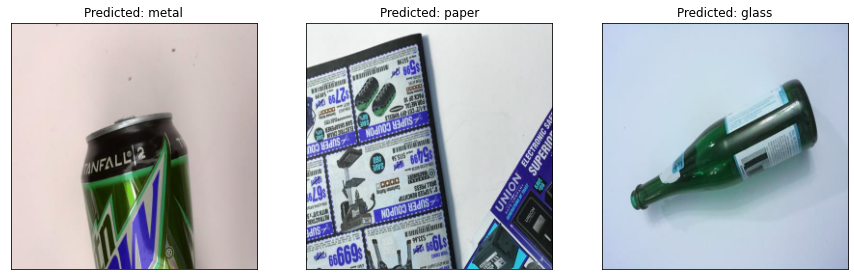

In [30]:
###  ResNet-50 model 
predict_restnet50_model(num_rows, num_cols,image_list);

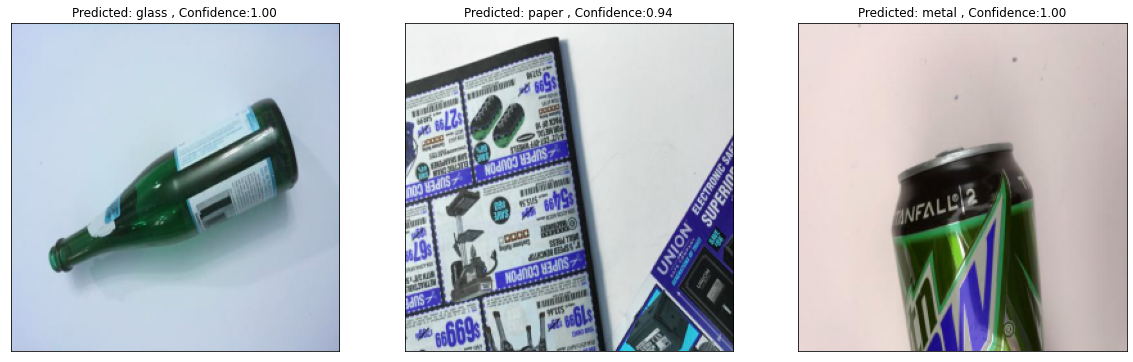

In [27]:
### Densenet-121 model
predict_densenet121_model(num_rows, num_cols,image_list);

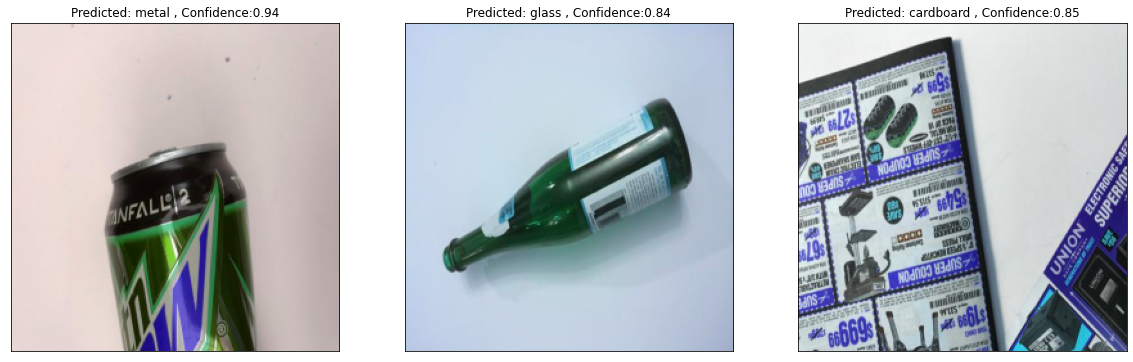

In [28]:
### CNN model
predict_cnn_model(num_rows, num_cols,image_list);